# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [132]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [133]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 639


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [135]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}'
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather = city_weather.json()
        
    

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather['coord']['lat']
        city_lng = weather['coord']['lon']
        city_temp = weather['main']['temp_max']
        city_max_temp = city_temp - 273
        city_humidity = weather['main']['humidity']
        city_clouds =  weather['clouds']['all']
        city_wind = weather['wind']['speed']
        city_country = weather['sys']['country']
        city_date = weather['timezone']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | saint-joseph
Processing Record 6 of Set 1 | brunico
Processing Record 7 of Set 1 | russell
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | mar del plata
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mahebourg
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | the pas
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | colesberg
Processing Record 18 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | kapaa
Processing Rec

Processing Record 38 of Set 4 | dahuk
Processing Record 39 of Set 4 | paamiut
Processing Record 40 of Set 4 | ous
Processing Record 41 of Set 4 | srednekolymsk
Processing Record 42 of Set 4 | tura
Processing Record 43 of Set 4 | mount gambier
Processing Record 44 of Set 4 | butaritari
Processing Record 45 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | kikwit
Processing Record 48 of Set 4 | hammond
Processing Record 49 of Set 4 | mirador
Processing Record 0 of Set 5 | geraldton
Processing Record 1 of Set 5 | shibarghan
City not found. Skipping...
Processing Record 2 of Set 5 | monrovia
Processing Record 3 of Set 5 | berdigestyakh
Processing Record 4 of Set 5 | gorham
Processing Record 5 of Set 5 | vila franca do campo
Processing Record 6 of Set 5 | la uribe
City not found. Skipping...
Processing Record 7 of Set 5 | avera
Processing Record 8 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing

Processing Record 25 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 26 of Set 8 | lakselv
Processing Record 27 of Set 8 | bodden town
Processing Record 28 of Set 8 | fairbanks
Processing Record 29 of Set 8 | rio grande
Processing Record 30 of Set 8 | nouadhibou
Processing Record 31 of Set 8 | lewistown
Processing Record 32 of Set 8 | kavieng
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | high rock
Processing Record 35 of Set 8 | kovur
Processing Record 36 of Set 8 | ariquemes
Processing Record 37 of Set 8 | xuddur
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | marsh harbour
Processing Record 40 of Set 8 | pervomaysk
Processing Record 41 of Set 8 | kloulklubed
Processing Record 42 of Set 8 | guaruja
Processing Record 43 of Set 8 | aquiraz
Processing Record 44 of Set 8 | billings
Processing Record 45 of Set 8 | port augusta
Processing Record 46 of Set 8 | abha
Processing Record 47 of Set 8 | broome
Processing Record

Processing Record 12 of Set 12 | tocopilla
Processing Record 13 of Set 12 | fairlie
Processing Record 14 of Set 12 | cayenne
Processing Record 15 of Set 12 | haapiti
Processing Record 16 of Set 12 | juiz de fora
Processing Record 17 of Set 12 | rosarito
Processing Record 18 of Set 12 | seymchan
Processing Record 19 of Set 12 | vuktyl
Processing Record 20 of Set 12 | akdepe
Processing Record 21 of Set 12 | york
Processing Record 22 of Set 12 | seoul
Processing Record 23 of Set 12 | amlagora
Processing Record 24 of Set 12 | dryden
Processing Record 25 of Set 12 | guajara-mirim
City not found. Skipping...
Processing Record 26 of Set 12 | olinda
Processing Record 27 of Set 12 | synya
Processing Record 28 of Set 12 | copacabana
Processing Record 29 of Set 12 | rocha
Processing Record 30 of Set 12 | dunedin
Processing Record 31 of Set 12 | dukat
Processing Record 32 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 33 of Set 12 | ambulu
Processing Record 34 of Set 12 | manac

In [136]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [137]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-31.56,68,20,5.14,CA,-25200
1,kodiak,57.7900,-152.4072,3.88,87,100,2.57,US,-32400
2,talnakh,69.4865,88.3972,-15.29,96,100,4.57,RU,25200
3,barrow,71.2906,-156.7887,-20.84,77,0,10.29,US,-32400
4,saint-joseph,-21.3667,55.6167,24.36,85,83,5.15,RE,14400


In [138]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [139]:
# Read saved data
cities_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cities_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-31.56,68,20,5.14,CA,-25200
1,kodiak,57.7900,-152.4072,3.88,87,100,2.57,US,-32400
2,talnakh,69.4865,88.3972,-15.29,96,100,4.57,RU,25200
3,barrow,71.2906,-156.7887,-20.84,77,0,10.29,US,-32400
4,saint-joseph,-21.3667,55.6167,24.36,85,83,5.15,RE,14400


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

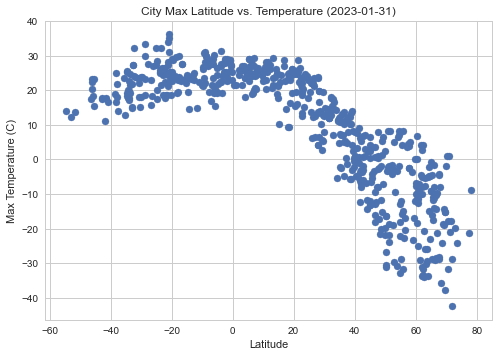

In [140]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df['Lat']
y_values= city_data_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-01-31)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

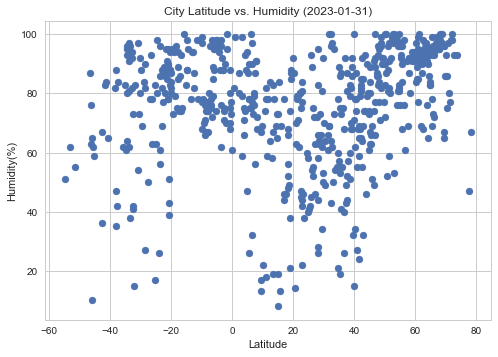

In [141]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df['Lat']
y_values= city_data_df['Humidity']

plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2023-01-31)')


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

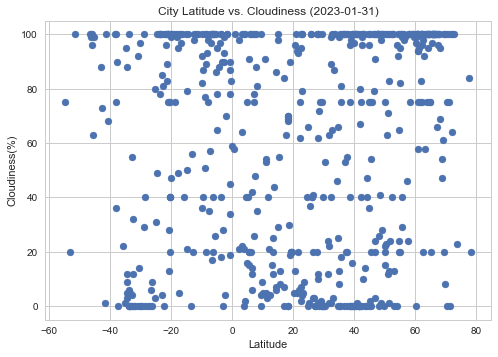

In [142]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_df['Lat']
y_values= city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness (2023-01-31)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

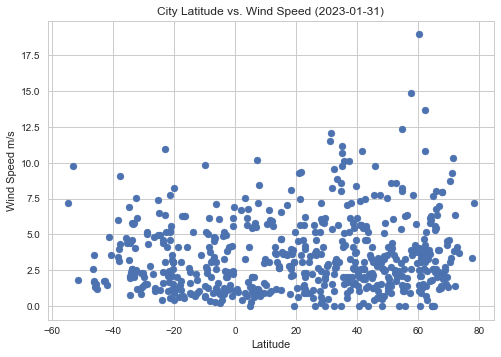

In [143]:
# Build the scatter plots for latitude vs. wind speed
x_values= city_data_df['Lat']
y_values= city_data_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel('Wind Speed m/s')
plt.title('City Latitude vs. Wind Speed (2023-01-31)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [144]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [145]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[(city_data_df['Lat']>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-31.56,68,20,5.14,CA,-25200
1,kodiak,57.7900,-152.4072,3.88,87,100,2.57,US,-32400
2,talnakh,69.4865,88.3972,-15.29,96,100,4.57,RU,25200
3,barrow,71.2906,-156.7887,-20.84,77,0,10.29,US,-32400
5,brunico,46.7958,11.9364,0.76,92,20,0.66,IT,3600


In [146]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[(city_data_df['Lat']<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,saint-joseph,-21.3667,55.6167,24.36,85,83,5.15,RE,14400
7,punta arenas,-53.1500,-70.9167,12.21,62,20,9.77,CL,-10800
8,atuona,-9.8000,-139.0333,26.25,77,92,9.86,PF,-34200
9,mar del plata,-38.0023,-57.5575,21.87,88,75,3.13,AR,-10800
10,rikitea,-23.1203,-134.9692,26.38,69,4,6.32,PF,-32400


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7315442945870765


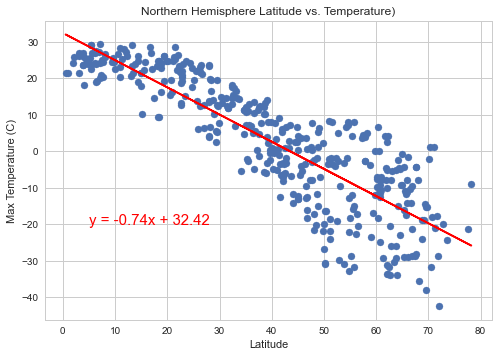

In [147]:
# Linear regression on Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere Latitude vs. Temperature)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()


The r-value is: 0.1901152484024449


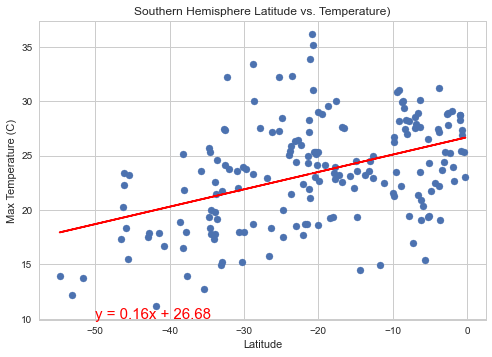

In [148]:
# Linear regression on Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere Latitude vs. Temperature)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The first plot indicates maximum temperatures at various latitudes in the northern hemisphere. The relationship is significantly (high r-value)inversely proportional. The further north one travels away from the equator, the lower the temperatures.
The second plot shows the same values for the southern hemisphere. Here, maximum temperatures get higher as one travels towards the equator.There is a weak positive correlation between the two values.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18122266571159842


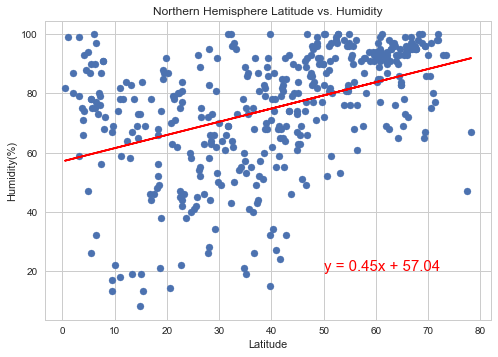

In [149]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.11343021546012659


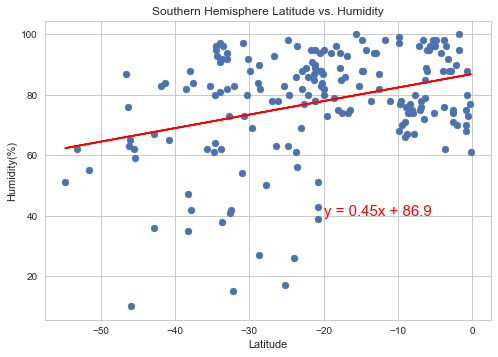

In [150]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above two plots show the relationship of latitude with humidity, in the northern and southern hemisphere respectively. Both the results show a weak positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11465934867882262


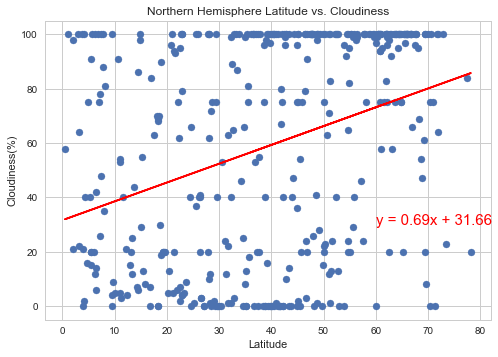

In [151]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.044786177646734274


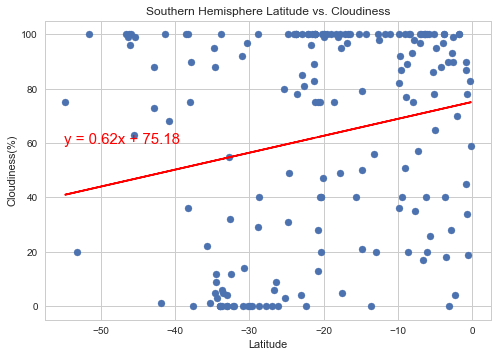

In [152]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above two plots show the relationship between latitude and cloudiness in the northern and southern hemisphere respectively. Both of them show a very weak positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004935132452146336


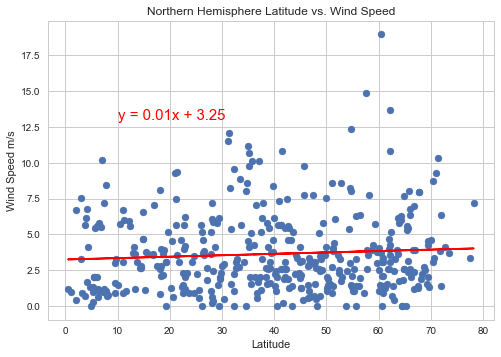

In [153]:
# Northern Hemisphere
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,13),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.01879916869208143


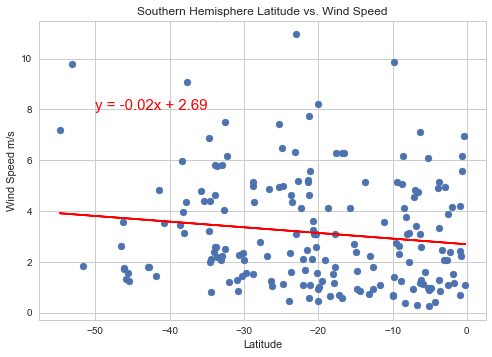

In [154]:
# Southern Hemisphere
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed m/s')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** The above two plots show the relationship between latitude and wind speeds in the northern and southern hemispheres respectively. In the northern hemisphere, there is a lack of association between the two, whereas, in the southern hemisphere, there is a very weak negative association between the latitude and windspeed in any given location.